## importing packages

In [ ]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing datasets
train=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/tamil_sentiment_full_train.tsv',sep='\t')
dev=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/tamil_sentiment_full_dev.tsv',sep='\t')
test=pd.read_csv('/content/drive/MyDrive/project/main/Trials/Dataset/tamil_sentiment_full_test_withoutlabels.tsv',sep='\t')

# Fitting data

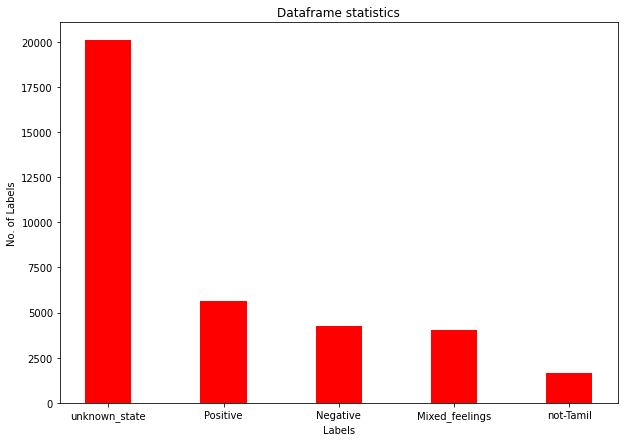

Positive          20070
unknown_state      5628
Negative           4271
Mixed_feelings     4020
not-Tamil          1667
Name: category, dtype: int64

In [ ]:
#Fitting Labels
train['category'] = train['category'].str.strip()

#Visualizing datas
Labels =  train['category'].unique()
count =   train['category'].value_counts()
  
fig = plt.figure(figsize = (10, 7))

# creating the bar plot
plt.bar(Labels, count, color ='red',  width = 0.4)
 
plt.xlabel("Labels")
plt.ylabel("No. of Labels")
plt.title("Dataframe statistics")
plt.show()

#Label counts
train['category'].value_counts()

In [ ]:
#removing punctuations
import string
def remove_punctuations(txt):
    text_nopunc="".join([c for c in txt if c not in string.punctuation])
    return text_nopunc

train['text']=train['text'].apply(lambda x: remove_punctuations(x))



# Preprocessing data

In [ ]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
train['category']=Encoder.fit_transform(train['category'])
dev['category']= Encoder.fit_transform(dev['category'])

In [ ]:
train['category'].value_counts()

2    20070
4     5628
1     4271
0     4020
3     1667
Name: category, dtype: int64

# Feature extraction  -  **tfidf**

In [ ]:
#TfidfVectorizer

tfidf = TfidfVectorizer(max_features=2000)
train_tfidf = tfidf.fit_transform(train['text']).toarray()
dev_tfidf = tfidf.transform(dev['text']).toarray()
test_tfidf = tfidf.transform(test['text']).toarray()

In [ ]:
#spliting datas for training

X_train = train_tfidf
y_train = train['category']
X_dev = dev_tfidf
y_dev = dev['category']
X_test = test_tfidf

# model

## SVM

In [ ]:
#SVM
from sklearn.svm import SVC
SVM = SVC(C=1.0, kernel = 'linear', degree = 3, gamma = 'auto')
SVM.fit(X_train, y_train)
y_pred_svm = SVM.predict(X_dev)

In [ ]:
#Evluating SVM Model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_dev,y_pred)) #used to see the accuracy of th
print(classification_report(y_dev, y_pred_svm))


In [ ]:
#predicting test dataset
y_pred_test_svm= SVM.predict(X_test)

## Naive Bayes

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(X_train, y_train)
NB_pred_tfidf_dev = NB_tfidf.predict(X_dev)

In [ ]:
# Evaluating Naive Bayes Classifier
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_dev, NB_pred_tfidf_dev)) #used to see the accuracy of th
print(classification_report(y_dev,NB_pred_tfidf_dev))


[[  33   49  324    6   26]
 [  15  121  315    5   24]
 [  17   51 2119   11   59]
 [   0    1   89   78    8]
 [  22   37  422    7  123]]
              precision    recall  f1-score   support

           0       0.38      0.08      0.13       438
           1       0.47      0.25      0.33       480
           2       0.65      0.94      0.77      2257
           3       0.73      0.44      0.55       176
           4       0.51      0.20      0.29       611

    accuracy                           0.62      3962
   macro avg       0.55      0.38      0.41      3962
weighted avg       0.58      0.62      0.56      3962



In [ ]:
#predicting test data
NB_pred_tfidf_test = NB_tfidf.predict(X_test)

## Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler(with_mean=False)
X_Train_RF = sc_X.fit_transform(X_train)
X_dev_RF = sc_X.transform(X_dev)
X_test_RF = sc_X.transform(X_test)

#Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train_RF,y_train)

# Predicting the dev set 
Y_Pred = classifier.predict(X_dev_RF)

In [ ]:
# Evaluating Random Forest
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_dev,Y_Pred)) #used to see the accuracy of th
print(classification_report(y_dev,Y_Pred))

[[  24   26  343    7   38]
 [  16  102  325    8   29]
 [  30   45 2063   25   94]
 [   1    4   78   84    9]
 [  14   33  376   14  174]]
              precision    recall  f1-score   support

           0       0.28      0.05      0.09       438
           1       0.49      0.21      0.30       480
           2       0.65      0.91      0.76      2257
           3       0.61      0.48      0.54       176
           4       0.51      0.28      0.36       611

    accuracy                           0.62      3962
   macro avg       0.51      0.39      0.41      3962
weighted avg       0.56      0.62      0.56      3962



In [ ]:
#predicting test data
Y_Pred = classifier.predict(X_test_RF)